## Table of Content
1. [Introduction to Spam Filtering](#section1)<br>
2. [Import Libraries](#section2)<br>
3. [Import Data](#section3)<br>
4. [Data Preprocessing](#section4)<br>
	- 4.1 [Check Null Columns](#section401)<br>
    - 4.2 [Drop Unnecessaary Columns](#section402)<br>
    - 4.3 [Text Column Processing](#section403)<br>
    - 4.4 [Convert words to vector](#section404)<br>
    
5. [Import Models & Metrics](#section5)<br>
6. [Train test split](#section6)<br>
7. [Applying Models](#section7)<br>
	- 7.1 [Expected Outcome from Model](#section701)<br>
	- 7.2 [Multinomial Naive Bayes](#section702)<br>
	- 7.3 [Logistic Regression](#section703)<br>
	- 7.4 [Decision Tree Classifier](#section704)<br>
	- 7.5 [Random Forest Classifier](#section705)<br>
	- 7.6 [SVM Classifier](#section706)<br>
	- 7.7 [K Nearest Neighbour Classifier](#section707)<br>
8. [Conclusion](#section8)<br>

<a id=section1></a> 
## 1.Introduction to Spam Filtering

The mobile phone market has experienced a substantial growth over recent years.
As the utilization of **smartphones have become a commonplace, & hence Short Message Service (SMS) has grown into a multi-billion dollars commercial industry to target customers.** 
SMS is the most widely used data application. As the popularity of the platform increased, users
have seen a surge in the number of unsolicited commercial advertisements sent to mobile phones using text messaging.

Hence there seemed a need to **classifying the messages into Spam or Ham category**. 

In this notebook, I have tried to apply the different ML text classification techniques to the SMS data file contraining over 5500 messages.


<img src ='https://raw.githubusercontent.com/PriyankaGPawar/MachineLearningWith_Python/master/ML_Term2_Project/sms_image2.jpg' width="650" height="250">

<a id=section2></a> 
## 2.Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id=section3></a>
## 3.Import Data

<img src ='https://raw.githubusercontent.com/PriyankaGPawar/MachineLearningWith_Python/master/ML_Term2_Project/sms_image1.jpeg' width= "650" height="250">

In [2]:
sms= pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/spam.csv', encoding='latin-1')

In [3]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
sms.shape

(5572, 5)

<a id=section4></a> 
## 4.Data Preprocessing

<a id=section401></a>
### 4.1 Check Null Columns

In [5]:
sms['Unnamed: 2'].isnull().sum()/len(sms) *100

99.10265613783201

In [6]:
sms['Unnamed: 3'].isnull().sum()/len(sms) *100
sms['Unnamed: 4'].isnull().sum()/len(sms) *100

99.89231873653985

<a id=section402></a>
### 4.2 Drop unnecessary Columns

In [7]:
# let's drop columns beyond 'Unnamed: 2' including itself

sms.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace= True)

In [8]:
sms.shape

(5572, 2)

In [9]:
sms = sms.rename(columns = {'v1':'label','v2':'message'})

In [10]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


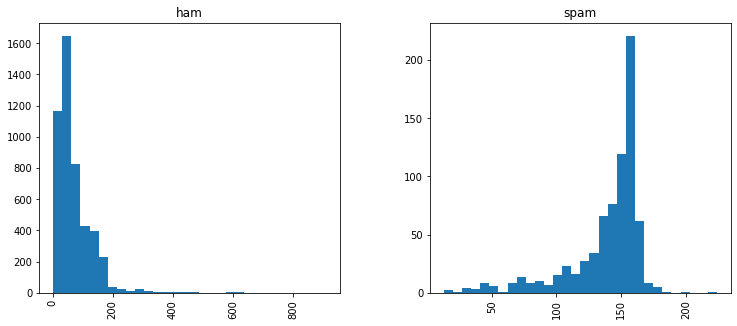

In [12]:
sms.hist(column='length',by='label', bins=30,figsize=(12,5))
mpl.rcParams['patch.force_edgecolor'] = True

In [13]:
# Observation : 
#       1. Length of the 'Spam' messages is more than 100 in general . So Longer the message, more is probability of being spam
#       2. Majority of 'NON Spam' messages tend to be between 0 to 100 in terms of length. Very less messages go beyond 100. 

In [14]:
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
text_sms = sms['message'].copy()

In [16]:
type(text_sms)

pandas.core.series.Series

<a id=section403></a>
### 4.3 Text Column Preprocessing

In [17]:
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')

def text_process(text):   
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    words = ""
    for i in text:          
          ps=PorterStemmer()
          words += (ps.stem(i))+" "
    return words

text_sms = sms['message'].copy()
text_sms = text_sms.apply(text_process)
print(text_sms)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
0       Go jurong point crazi avail bugi n great world...
1                                  Ok lar joke wif u oni 
2       free entri 2 wkli comp win FA cup final tkt 21...
3                    U dun say earli hor U c alreadi say 
4              nah dont think goe usf live around though 
                              ...                        
5567    2nd time tri 2 contact u U å£750 pound prize 2...
5568                             Ì b go esplanad fr home 
5569                             piti mood soani suggest 
5570    guy bitch act like id interest buy someth els ...
5571                                      rofl true name 
Name: message, Length: 5572, dtype: object


In [18]:
#import nltk
#nltk.download('punkt')
#from nltk.tokenize import word_tokenize
####function to split text into word
#tokens = word_tokenize("The quick brown fox jumps over the lazy dog")
#nltk.download('stopwords')
#print(tokens)

<a id=section404></a>
### 4.4 Convert Words to Vector

In [19]:
vectorizer = TfidfVectorizer("english")
X_tf = vectorizer.fit_transform(text_sms)

In [20]:
X_tf

<5572x8039 sparse matrix of type '<class 'numpy.float64'>'
	with 46979 stored elements in Compressed Sparse Row format>

In [21]:
count_vec=CountVectorizer()
X_ct=count_vec.fit_transform(text_sms)

In [22]:
X_ct

<5572x8039 sparse matrix of type '<class 'numpy.int64'>'
	with 46979 stored elements in Compressed Sparse Row format>

<a id=section5></a>
## 5. Import Models and Metrics

In [23]:
# import models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# import metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

<a id=section6></a> 
## 6. Train test Split

In [24]:
X_train, X_test, y_train,y_test= train_test_split(X_tf, sms['label'], test_size=.30, random_state =1)

In [25]:
print('Shape of X_train',X_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of y_train',y_train.shape)
print('Shape of y_test',y_test.shape)

Shape of X_train (3900, 8039)
Shape of X_test (1672, 8039)
Shape of y_train (3900,)
Shape of y_test (1672,)


<a id=section7></a> 
## 7.Applying Models

In [26]:
# In following steps we will apply different model on the data and validate which model 
# is able to provide the optimal results against the dataset

<a id=section701></a>
### 7.1 Expected Outcome from Model

In [27]:
#	      ham	    spam
# ham 	00 TN 	01 FP	
# spam	10 FN	  11 TP


# 0-negative (ham)
# 1-positive (spam)

# Let's consider task of classifying the message as SPAM 'positive' case
# and classifying it as HAM -a 'negative' case 

# Expected outcome of modelling should be - classifying SPAM message as a SPAM (positive case). 
# However, I as a client also want to focus on 
# "NOT MISSING OUT ON AN IMPORTANT MESSAGE (HAM)" by classifying it as "SPAM" (FALSE POSITIVE) 

# Hence we will have to focus upon increasing RECALL along with increasing PRECISION metrics and hence 
# increasing the F1 score altogether to improve both of them

<a id=section702></a>
### 7.2 Multinomial Naive Bayes

In [28]:
mnb =MultinomialNB()
mnb.fit(X_train, y_train)
y_pred =mnb.predict(X_test)

In [29]:
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
print('Accuracy Score of Multinomial NB:',metrics.accuracy_score(y_test,y_pred))

Accuracy Score of Multinomial NB: 0.9617224880382775


In [31]:
metrics.confusion_matrix(y_test, y_pred)

array([[1454,    0],
       [  64,  154]])

In [32]:
mnb1 =MultinomialNB(alpha=0.1)
mnb1.fit(X_train, y_train)
y_pred =mnb1.predict(X_test)

### Accuracy Score

In [79]:
score1 =metrics.accuracy_score(y_test,y_pred)
print(score1)

0.9778708133971292


In [232]:
# prediction score holding dictionary
pred_dict = {'mnb':score1}


In [233]:
pred_dict

{'mnb': 0.9778708133971292}

### Classification Report

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1454
        spam       0.92      0.91      0.91       218

    accuracy                           0.98      1672
   macro avg       0.95      0.95      0.95      1672
weighted avg       0.98      0.98      0.98      1672



### Confusion Matrix


In [35]:
metrics.confusion_matrix(y_test, y_pred)

array([[1436,   18],
       [  19,  199]])

In [36]:

def model_training(model,X,y):
  model,X_train,y_train = model, X, y

  for k,v in model_dict: 
    model.fit(X_Train, y_train)

### Find Best Estimator using GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
alphas = np.linspace(0,1,15)

# create and fit Multinomial Naive Bayes model, testing each alpha
model =MultinomialNB()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print('\n Best Score:',grid.best_score_)
print('\n Best Estimator:',grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

 Best Score: 0.9807692307692308

 Best Estimator: 0.14285714285714285


In [91]:
mnb1=MultinomialNB(alpha=0.15)
mnb1.fit(X_train, y_train)
y_test_mnb1=mnb1.predict(X_test)

In [106]:
score2=metrics.accuracy_score(y_test,y_test_mnb1)
print(f'Accuracy Score of MNB after tuning is : {score2}')

Accuracy Score of MNB after tuning is : 0.9778708133971292


In [234]:
pred_dict.update({'mnb':(score1,score2)})
pred_dict

{'mnb': (0.9778708133971292, 0.9778708133971292)}

In [40]:
print(classification_report(y_test, y_test_mnb1))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1454
        spam       0.92      0.91      0.91       218

    accuracy                           0.98      1672
   macro avg       0.95      0.95      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [41]:
# Observation : precision, recall, f1-score of HAM and SPAM has improved

### Find Best Estimator using RandomizedSearchCV

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_rand
param_grid = {'alpha': sp_rand()}

model=MultinomialNB()
RCV = RandomizedSearchCV(model,param_distributions=param_grid,n_iter= 15)
RCV.fit(X_train, y_train)
print(RCV)
# summarize the results of the grid search
print('\n Best Score:',RCV.best_score_)
print('\n Best Estimator:',RCV.best_estimator_.alpha)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                           fit_prior=True),
                   iid='deprecated', n_iter=15, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8d3f88d080>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

 Best Score: 0.9805128205128206

 Best Estimator: 0.2699442381508792


In [117]:
mnb2=MultinomialNB(alpha=0.2)
mnb2.fit(X_train, y_train)
y_test_mnb2=mnb2.predict(X_test)

score3=metrics.accuracy_score(y_test_mnb2,y_test)
print(f'Accuracy Score of MNB after randomized SearchCV :{score3}') 

Accuracy Score of MNB after randomized SearchCV :0.9772727272727273


<a id=section703></a>
### 7.3 Logistic Regression

In [118]:
lr= LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr =lr.predict(X_test)

score3=metrics.accuracy_score(y_pred_lr,y_test)
print(f'Accuracy Score of Logistic Regression: {score3}')

Accuracy Score of Logistic Regression: 0.9527511961722488


### Tuning the Model- GridSearchCV

In [45]:
model =LogisticRegression()

param_grid= { 'penalty' : ('l1', 'l2'),
'fit_intercept' : ('True','False'),
'solver' : (['liblinear']) }

GCV = GridSearchCV(model, param_grid=dict(param_grid))
GCV.fit(X_train, y_train)

# summarize the results of the grid search
print('\n Best Score:',GCV.best_score_)
print('\n Best Estimator:',GCV.best_estimator_)


 Best Score: 0.9443589743589744

 Best Estimator: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept='True',
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [46]:
 lr_tuned =LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept='True',
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
 
lr_tuned.fit(X_train, y_train)
y_pred_lr1 = lr_tuned.predict(X_test)

### Accuracy Score & Confusion Matrix

In [120]:
score4=metrics.accuracy_score(y_test,y_pred_lr1)

print(f'Accuracy Score of Tuned Logistic Regression: {score4}')

Accuracy Score of Tuned Logistic Regression: 0.9557416267942583


In [235]:
pred_dict.update({'LogReg':(score3,score4)})
print(pred_dict)

{'mnb': (0.9778708133971292, 0.9778708133971292), 'LogReg': (0.9527511961722488, 0.9557416267942583)}


In [48]:
# Observation : Accuracy for Logistic regression improved with slight margin

In [49]:
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred_lr1))
confusion_matrix.index = ['Actual Ham','Actual Spam']
confusion_matrix.columns = ['Predicted Ham','Predicted Spam']
print(confusion_matrix)

print('\n Classification_report :\n',classification_report(y_test,y_pred_lr1))

             Predicted Ham  Predicted Spam
Actual Ham            1445               9
Actual Spam             65             153

 Classification_report :
               precision    recall  f1-score   support

         ham       0.96      0.99      0.98      1454
        spam       0.94      0.70      0.81       218

    accuracy                           0.96      1672
   macro avg       0.95      0.85      0.89      1672
weighted avg       0.96      0.96      0.95      1672



<a id=section704></a>
### 7.4 Decision Tree Classifier

In [50]:
dt= DecisionTreeClassifier(random_state=1)

dt.fit(X_train,y_train)
y_pred_dt =dt.predict(X_test)

In [51]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [123]:
score5=metrics.accuracy_score(y_test,y_pred_dt)
print('Accuracy Score of Decision Tree:',score5)
print('Confusion matrix for DT: \n',metrics.confusion_matrix(y_test,y_pred_dt))

Accuracy Score of Decision Tree: 0.9569377990430622
Confusion matrix for DT: 
 [[1426   28]
 [  44  174]]


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

         ham       0.97      0.98      0.98      1454
        spam       0.86      0.80      0.83       218

    accuracy                           0.96      1672
   macro avg       0.92      0.89      0.90      1672
weighted avg       0.96      0.96      0.96      1672



### Find Best DT Estimator

In [54]:
DT = DecisionTreeClassifier(random_state=1)
criterion =['gini','entropy']
min_samples_split =[1,2,3,4]
parameters = dict(min_samples_split =min_samples_split ,criterion=criterion)
print(parameters)

{'min_samples_split': [1, 2, 3, 4], 'criterion': ['gini', 'entropy']}


In [55]:
clf = GridSearchCV(DT,param_grid=parameters,cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [1, 2, 3, 4]},
       

In [56]:
print('Best estimator:',clf.best_estimator_)
print('Best score :',clf.best_score_)
print('Best Paramteres:',clf.best_params_)

Best estimator: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')
Best score : 0.9551282051282052
Best Paramteres: {'criterion': 'gini', 'min_samples_split': 4}


In [57]:
DT1=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')
DT1.fit(X_train,y_train)
y_pred_dtclf = DT1.predict(X_test)

In [125]:
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred_dtclf))
confusion_matrix.index = ['Actual Ham','Actual Spam']
confusion_matrix.columns = ['Predicted Ham','Predicted Spam']
print(confusion_matrix)

score6=metrics.accuracy_score(y_test,y_pred_dtclf)

print('\n Classification_report :\n',classification_report(y_test,y_pred_dtclf))
print('Accuracy Score of Decision Tree:', score6)

             Predicted Ham  Predicted Spam
Actual Ham            1426              28
Actual Spam             44             174

 Classification_report :
               precision    recall  f1-score   support

         ham       0.97      0.98      0.98      1454
        spam       0.86      0.80      0.83       218

    accuracy                           0.96      1672
   macro avg       0.92      0.89      0.90      1672
weighted avg       0.96      0.96      0.96      1672

Accuracy Score of Decision Tree: 0.9569377990430622


In [59]:
# Observation: There is NO increase in the accuracy of f1 scores at all. So the baseline model itself is the 
#              the best model that gives 95.69% of accuracy

In [236]:
pred_dict.update({'DT':(score5,score6)})
print(pred_dict)

{'mnb': (0.9778708133971292, 0.9778708133971292), 'LogReg': (0.9527511961722488, 0.9557416267942583), 'DT': (0.9569377990430622, 0.9569377990430622)}


<a id=section705></a>
### 7.5 Random Forest Classifier

In [131]:
rfc =RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_test)
score7=metrics.accuracy_score(y_test,y_pred_rfc)
print(f'Accuracy of Random Forest Classifier: {score7}')
        

Accuracy of Random Forest Classifier: 0.9748803827751196


In [237]:
pred_dict.update({'RF':(score7)})
print(pred_dict)

{'mnb': (0.9778708133971292, 0.9778708133971292), 'LogReg': (0.9527511961722488, 0.9557416267942583), 'DT': (0.9569377990430622, 0.9569377990430622), 'RF': 0.9748803827751196}


<a id=section706></a>
### 7.6 SVM Classifier

In [133]:
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
score9= metrics.accuracy_score(y_test,y_pred_svm)
print('Accuracy of SVM Classifier:',score9)

Accuracy of SVM Classifier: 0.9700956937799043


In [ ]:
# Hyper parameter tuning for SVM Classifier

In [134]:
clf_svm1 = SVC(random_state=1, kernel ='sigmoid')
clf_svm1.fit(X_train, y_train)
y_pred_svm1 = clf_svm1.predict(X_test)

score10= metrics.accuracy_score(y_test,y_pred_svm1)
print('Accuracy of SVM Classifier:',score10)

Accuracy of SVM Classifier: 0.9772727272727273



### Tuning SVC

In [63]:
model =SVC()

param_grid= { 'kernel' : ('linear','poly','rbf','sigmoid') }

clf_svm_gcv = GridSearchCV(model, param_grid=dict(param_grid))
clf_svm_gcv.fit(X_train, y_train)

# summarize the results of the grid search
print('\n Best Score:',clf_svm_gcv.best_score_)
print('\n Best Estimator:',clf_svm_gcv.best_estimator_)


 Best Score: 0.974102564102564

 Best Estimator: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [64]:
clf_svm_tuned = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True,
    tol=0.001, verbose=False)

clf_svm_tuned.fit (X_train, y_train)
y_pred_svm2 = clf_svm_tuned.predict(X_test)

print('Accuracy Score of Decision Tree:',metrics.accuracy_score(y_test,y_pred_svm2))
print('Confusion matrix for DT: \n',metrics.confusion_matrix(y_test,y_pred_svm2))

print('\n Classification_report :\n',classification_report(y_test,y_pred_svm2))

Accuracy Score of Decision Tree: 0.9766746411483254
Confusion matrix for DT: 
 [[1453    1]
 [  38  180]]

 Classification_report :
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1454
        spam       0.99      0.83      0.90       218

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.98      0.98      1672



In [65]:
#Observation : SVM works better after Multinomial NB classifier yielding 99% f1 score for ham classification. 
#             However the f1 score is low by alomost 10% for SPAM classification
#             Precision is pretty close to each other for spam and ham.

In [238]:
pred_dict.update({'SVC':(score9,score10)})
print(pred_dict)

{'mnb': (0.9778708133971292, 0.9778708133971292), 'LogReg': (0.9527511961722488, 0.9557416267942583), 'DT': (0.9569377990430622, 0.9569377990430622), 'RF': 0.9748803827751196, 'SVC': (0.9700956937799043, 0.9772727272727273)}


<a id=section707></a>
###  7.7 K Nearest Neighbour Classifier

In [136]:
clf_knn= KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)

score11 =metrics.accuracy_score(y_test,y_pred_knn)
print('Accuracy of KNN Classifier:', score11)

Accuracy of KNN Classifier: 0.9055023923444976


In [95]:
pred_scores = []            # define empty list

# Iterate through different values of neighbours like 3 to 61 to find the best no of neighbours for clusters
for i in range(3,61):       
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(X_train, y_train)
    pred = knc.predict(X_test)
    pred_scores.append((i, accuracy_score(y_test,pred)))
pred_scores
df=pd.DataFrame(pred_scores)
df.set_index(0, inplace=True)

,1
0,
35,0.940789
37,0.940789
39,0.939593
41,0.938995
43,0.938995


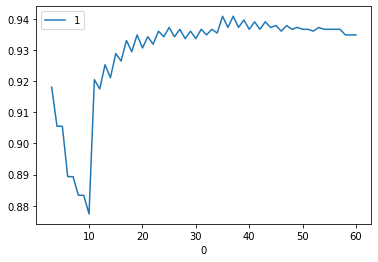

In [68]:
# Plot the graph of accuracy values across different values of KNN neighbours 
df.plot()
df.nlargest(5, columns=1)

In [69]:
# Observation : Above graph indicates that the maximum accuracy can be obtained from KNN
# with 35 or 37 number of neighbours 

In [225]:
s1 =df.nlargest(5, columns=1).iloc[0]
score12=s1[1]

In [239]:
pred_dict1=pred_dict.copy()

In [242]:
pred_dict=pred_dict1.copy()

In [243]:
pred_dict.update({'KNN':(score11, score12)})
print(pred_dict)

{'mnb': (0.9778708133971292, 0.9778708133971292), 'LogReg': (0.9527511961722488, 0.9557416267942583), 'DT': (0.9569377990430622, 0.9569377990430622), 'RF': 0.9748803827751196, 'SVC': (0.9700956937799043, 0.9772727272727273), 'KNN': (0.9055023923444976, 0.9407894736842105)}


In [244]:
pred_dict2=pred_dict.copy()

In [257]:
dff =pd.DataFrame(data=pred_dict)
dff1=dff.T
dff1.rename(columns= {0:'Base_Score', 1:'Tuned_Score'}, inplace=True)
dff1

,Base_Score,Tuned_Score
mnb,0.977871,0.977871
LogReg,0.952751,0.955742
DT,0.956938,0.956938
RF,0.974880,0.974880
SVC,0.970096,0.977273
KNN,0.905502,0.940789


Text(0.5, 1.0, 'Distribution by Classifier')

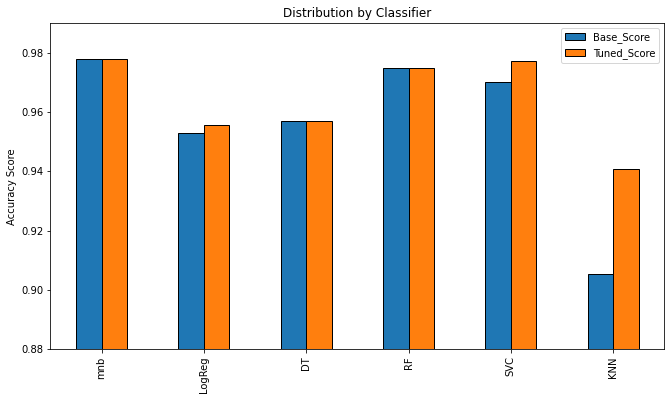

In [262]:
dff1.plot(kind='bar',figsize=(11,6),  ylim=(0.88,0.99),)

plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')

In [ ]:
#Observations :
#              1. Significant Accuracy Score Improvement for KNN after tuning
#              2. Highest Accuracy obtained through Multinomial Naive Bayes Classifer closely followed by SVC
#              3. Third best classifier in the series is Random forest classifer

<a id=section8></a> 
### 8. Conclusion

In [77]:
# The best classification report results are observed through Multinomial Naive Bayes Classifier.
# Also the precision, recall and f1-score is obtained by MNB